* Name: Yash Sontakke
* Batch: 15 MArch
* Course : Data Science

In [2]:
!pip install xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.9/153.9 MB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.9/190.9 MB 5.0 MB/s eta 0:00:00


In [3]:
!pip install openpyxl

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.9/250.9 kB 2.0 MB/s eta 0:00:00


In [6]:
# Import all necessary libraries
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import xgboost as xgb
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
import pickle, sys

In [8]:
print(f"Pandas version: {pd.__version__}")
print(f"NumPy version: {np.__version__}")
print(f"Matplotlib version: {matplotlib.__version__}")
print(f"Seaborn version: {sns.__version__}")
print(f"Scikit-learn version: {sklearn.__version__}")
print(f"XGBoost version: {xgb.__version__}")
print(f"pickle version: {sys.version}")

Pandas version: 2.1.4
NumPy version: 1.26.4
Matplotlib version: 3.7.1
Seaborn version: 0.13.1
Scikit-learn version: 1.3.2
XGBoost version: 2.1.1
pickle version: 3.10.12 (main, Jul 29 2024, 16:56:48) [GCC 11.4.0]


In [ ]:
# Load data
df = pd.read_excel('/content/sydney_rain prediction.xlsx', engine='openpyxl')

In [ ]:
# Displaying the first five rows of the dataset
df.head(10)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-02-01,Sydney,19.5,22.4,15.6,6.2,0.0,92.0,84.0,1017.6,1017.4,8.0,8.0,20.7,20.9,Yes,Yes
1,2008-02-02,Sydney,19.5,25.6,6.0,3.4,2.7,83.0,73.0,1017.9,1016.4,7.0,7.0,22.4,24.8,Yes,Yes
2,2008-02-03,Sydney,21.6,24.5,6.6,2.4,0.1,88.0,86.0,1016.7,1015.6,7.0,8.0,23.5,23.0,Yes,Yes
3,2008-02-04,Sydney,20.2,22.8,18.8,2.2,0.0,83.0,90.0,1014.2,1011.8,8.0,8.0,21.4,20.9,Yes,Yes
4,2008-02-05,Sydney,19.7,25.7,77.4,NaN,0.0,88.0,74.0,1008.3,1004.8,8.0,8.0,22.5,25.5,Yes,Yes
5,2008-02-06,Sydney,20.2,27.2,1.6,2.6,8.6,69.0,62.0,1002.7,998.6,6.0,6.0,23.8,26.0,Yes,Yes
6,2008-02-07,Sydney,18.6,26.3,6.2,5.2,5.2,75.0,80.0,999.0,1000.3,4.0,7.0,21.7,22.3,Yes,Yes
7,2008-02-08,Sydney,17.2,22.3,27.6,5.8,2.1,77.0,61.0,1008.3,1007.4,7.0,8.0,18.9,21.1,Yes,Yes
8,2008-02-09,Sydney,16.4,20.8,12.6,4.8,3.0,92.0,91.0,1006.4,1007.6,7.0,7.0,17.1,16.5,Yes,Yes
9,2008-02-10,Sydney,14.6,24.2,8.8,4.4,10.1,80.0,53.0,1014.0,1013.4,4.0,2.0,17.2,23.3,Yes,No


In [ ]:
# Displaying the shape of the dataset to understand its dimensionality
df.shape

(3337, 17)

In [ ]:
# Displaying information about the dataframe df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3337 entries, 0 to 3336
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          3337 non-null   datetime64[ns]
 1   Location      3337 non-null   object        
 2   MinTemp       3334 non-null   float64       
 3   MaxTemp       3335 non-null   float64       
 4   Rainfall      3331 non-null   float64       
 5   Evaporation   3286 non-null   float64       
 6   Sunshine      3321 non-null   float64       
 7   Humidity9am   3323 non-null   float64       
 8   Humidity3pm   3324 non-null   float64       
 9   Pressure9am   3317 non-null   float64       
 10  Pressure3pm   3318 non-null   float64       
 11  Cloud9am      2771 non-null   float64       
 12  Cloud3pm      2776 non-null   float64       
 13  Temp9am       3333 non-null   float64       
 14  Temp3pm       3333 non-null   float64       
 15  RainToday     3331 non-null   object  

In [ ]:
df.describe()

,Date,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,3337,3334.000000,3335.000000,3331.000000,3286.000000,3321.000000,3323.000000,3324.000000,3317.000000,3318.000000,2771.000000,2776.000000,3333.000000,3333.000000
mean,2012-10-16 01:24:34.737788672,14.865057,23.002339,3.330231,5.187432,7.179374,68.229010,54.699158,1018.346156,1016.018774,4.181523,4.218660,17.819742,21.533333
min,2008-02-01 00:00:00,4.300000,11.700000,0.000000,0.000000,0.000000,19.000000,10.000000,986.700000,989.800000,0.000000,0.000000,6.400000,10.200000
25%,2010-05-15 00:00:00,11.000000,19.600000,0.000000,3.200000,4.300000,58.000000,44.000000,1013.700000,1011.300000,1.000000,1.000000,13.800000,18.400000
50%,2012-09-28 00:00:00,14.900000,22.800000,0.000000,4.800000,8.300000,69.000000,56.000000,1018.600000,1016.300000,5.000000,4.000000,18.200000,21.300000
75%,2015-03-14 00:00:00,18.700000,26.000000,1.400000,7.000000,10.200000,80.000000,65.000000,1023.100000,1020.800000,7.000000,7.000000,21.700000,24.500000
max,2017-06-25 00:00:00,27.600000,45.800000,119.400000,18.400000,13.600000,100.000000,99.000000,1039.000000,1036.700000,9.000000,8.000000,36.500000,44.700000
std,NaN,4.553641,4.494638,9.895172,2.777407,3.810886,15.085355,16.293530,7.021571,7.032211,2.749578,2.641885,4.897177,4.303737


In [ ]:
# Listing all column names to understand the features
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm',
       'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'RainToday',
       'RainTomorrow'],
      dtype='object')

In [ ]:
# Checking for any missing or null values in the dataset
df.isnull().sum()

,0
Date,0
Location,0
MinTemp,3
MaxTemp,2
Rainfall,6
Evaporation,51
Sunshine,16
Humidity9am,14
Humidity3pm,13
Pressure9am,20


In [ ]:
# Imputing missing values
# For numerical variables
df['MinTemp'].fillna(df['MinTemp'].mean(), inplace=True)
df['MaxTemp'].fillna(df['MaxTemp'].mean(), inplace=True)
df['Rainfall'].fillna(df['Rainfall'].mean(), inplace=True)
df['Evaporation'].fillna(df['Evaporation'].median(), inplace=True)
df['Sunshine'].fillna(df['Sunshine'].median(), inplace=True)
df['Temp9am'].fillna(df['Temp9am'].mean(), inplace=True)
df['Temp3pm'].fillna(df['Temp3pm'].mean(), inplace=True)

In [ ]:
# For categorical variables
df['RainToday'].fillna(df['RainToday'].mode()[0], inplace=True)

# Dropping columns with too many missing values
df.drop(['Cloud9am', 'Cloud3pm'], axis=1, inplace=True)

# Handling missing values for humidity and pressure with median values
for column in ['Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm']:
    df[column].fillna(df[column].median(), inplace=True)

In [ ]:
# Check if there are any missing values left
print(df.isnull().sum())

Date            0
Location        0
MinTemp         0
MaxTemp         0
Rainfall        0
Evaporation     0
Sunshine        0
Humidity9am     0
Humidity3pm     0
Pressure9am     0
Pressure3pm     0
Temp9am         0
Temp3pm         0
RainToday       0
RainTomorrow    0
dtype: int64


In [ ]:
df.shape

(3337, 15)

# Treat Outliers

In [ ]:
# List of numerical columns you want to plot
numerical_columns = ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
                     'Sunshine', 'Humidity9am', 'Humidity3pm', 'Pressure9am',
                     'Pressure3pm', 'Temp9am', 'Temp3pm']

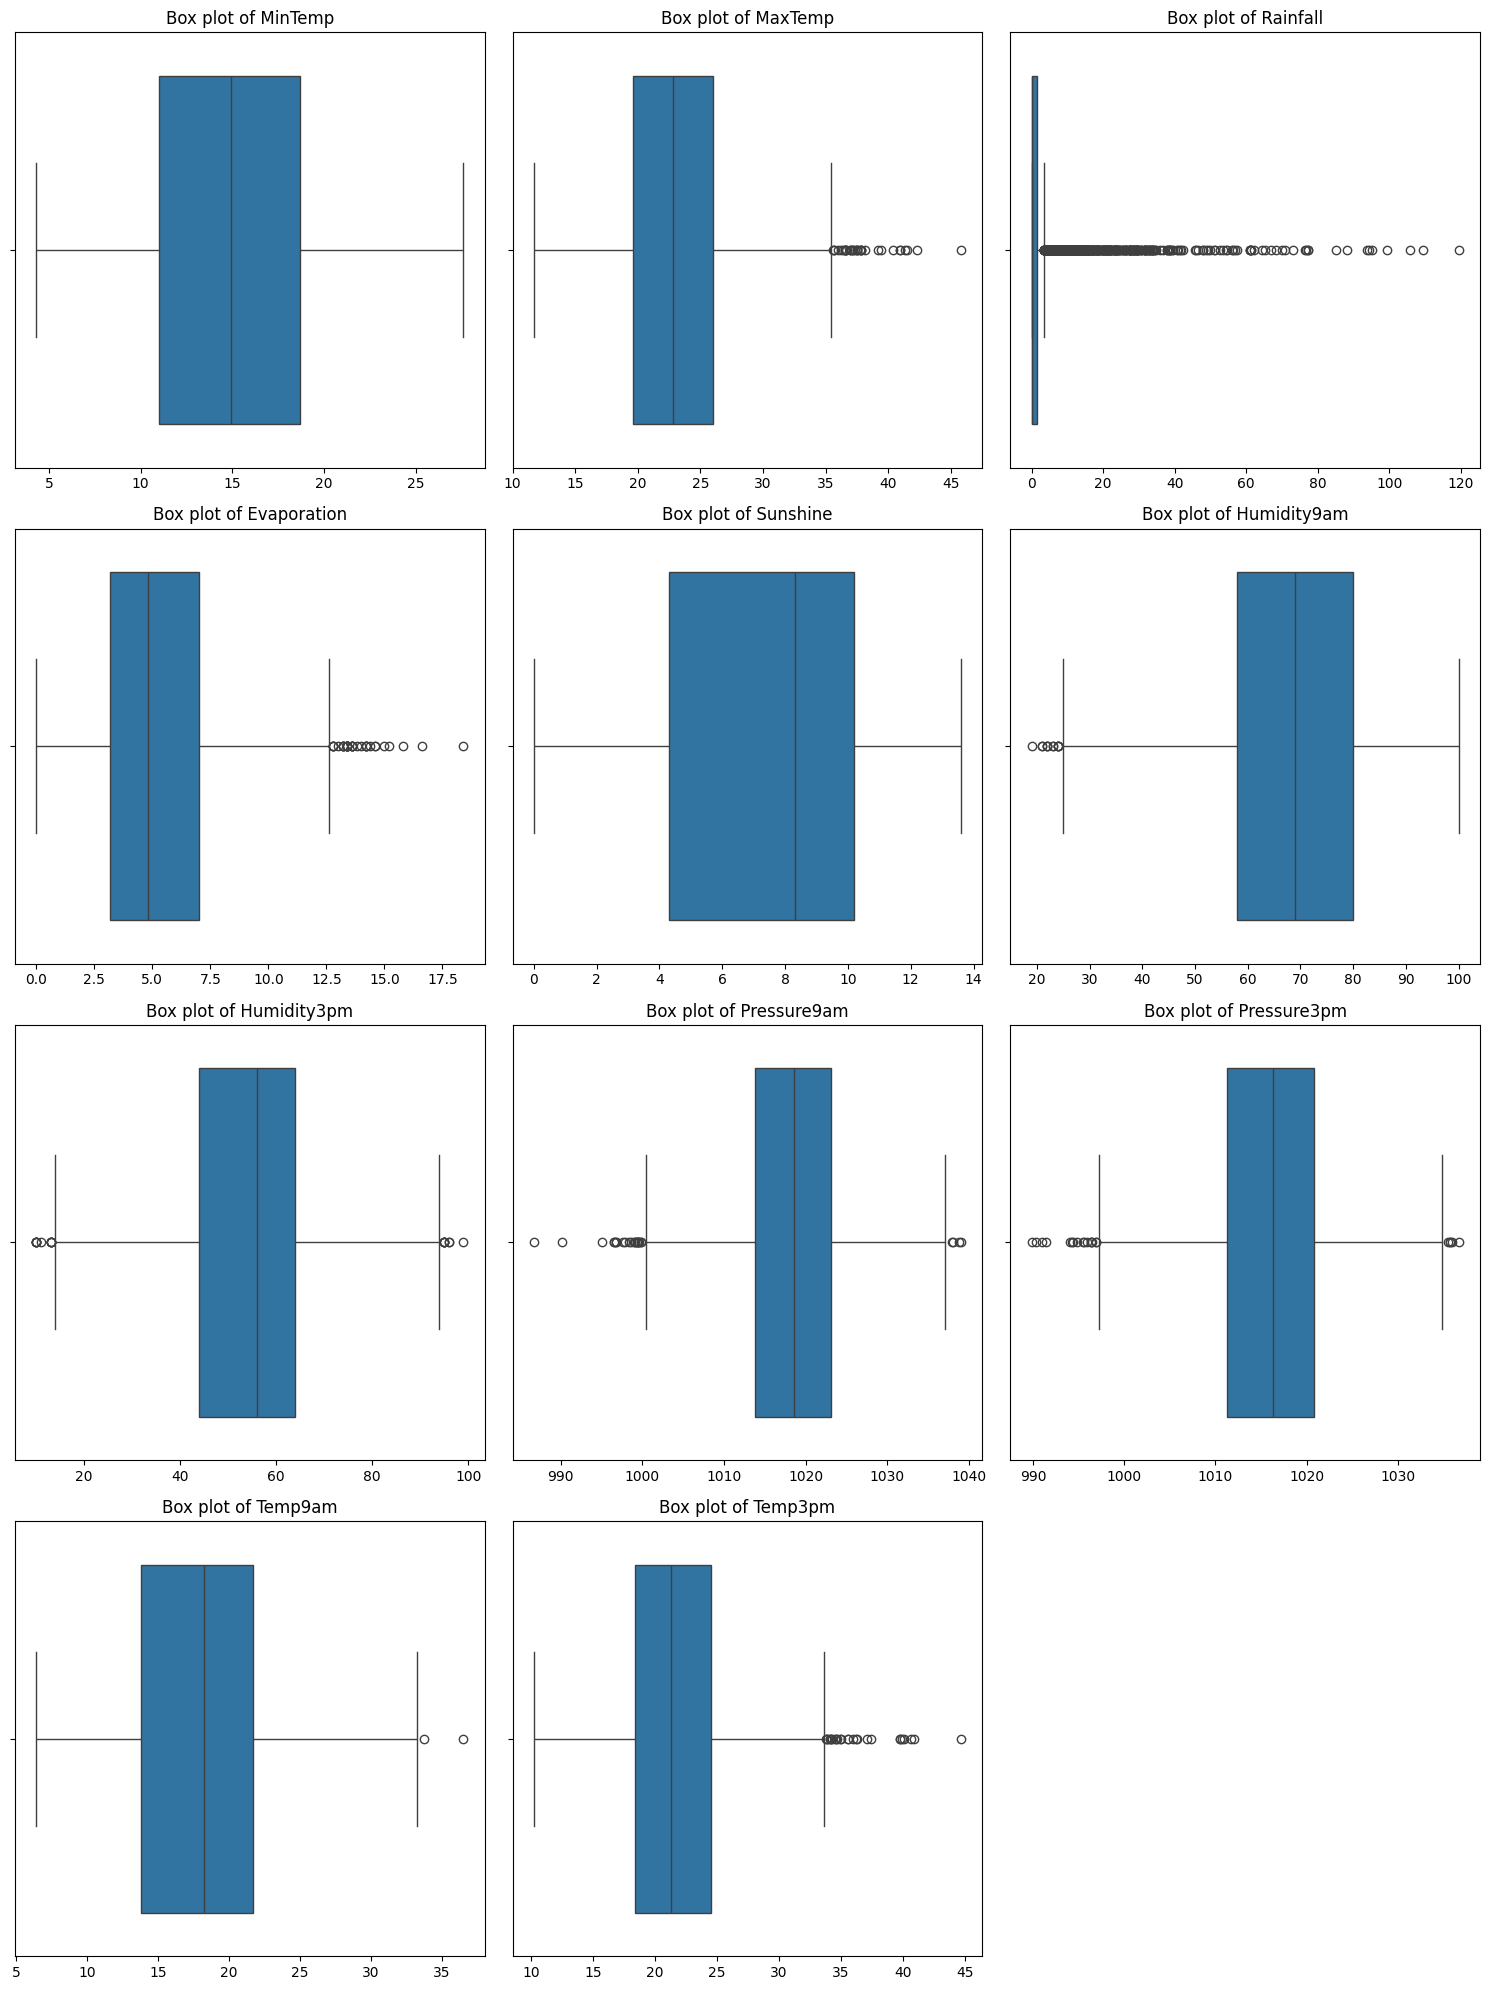

In [ ]:
# Determine the layout of the subplots
num_columns = 3
num_rows = (len(numerical_columns) + num_columns - 1) // num_columns

# Create a figure and axes for subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=num_columns, figsize=(15, 20))
axes = axes.flatten()

# Iterate over the columns and create a boxplot for each one
for i, col in enumerate(numerical_columns):
    sns.boxplot(x=df[col], ax=axes[i])
    axes[i].set_title(f'Box plot of {col}', fontsize=12)
    axes[i].set_xlabel('')

for ax in axes[len(numerical_columns):]:
    ax.axis('off')

# Adjust layout for better fit and display the plot
plt.tight_layout()
plt.show()

In [ ]:
# Make a copy of Orignal dataset in df1 dataframe
df1 = df.copy()

In [ ]:
for column in numerical_columns:
    Q1 = df1[column].quantile(0.25)
    Q3 = df1[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df1[column] = np.where(df1[column] > upper, upper, np.where(df1[column] < lower, lower, df1[column]))

Draw Box plot again after outlier treatment to check outliers are removed or reduced

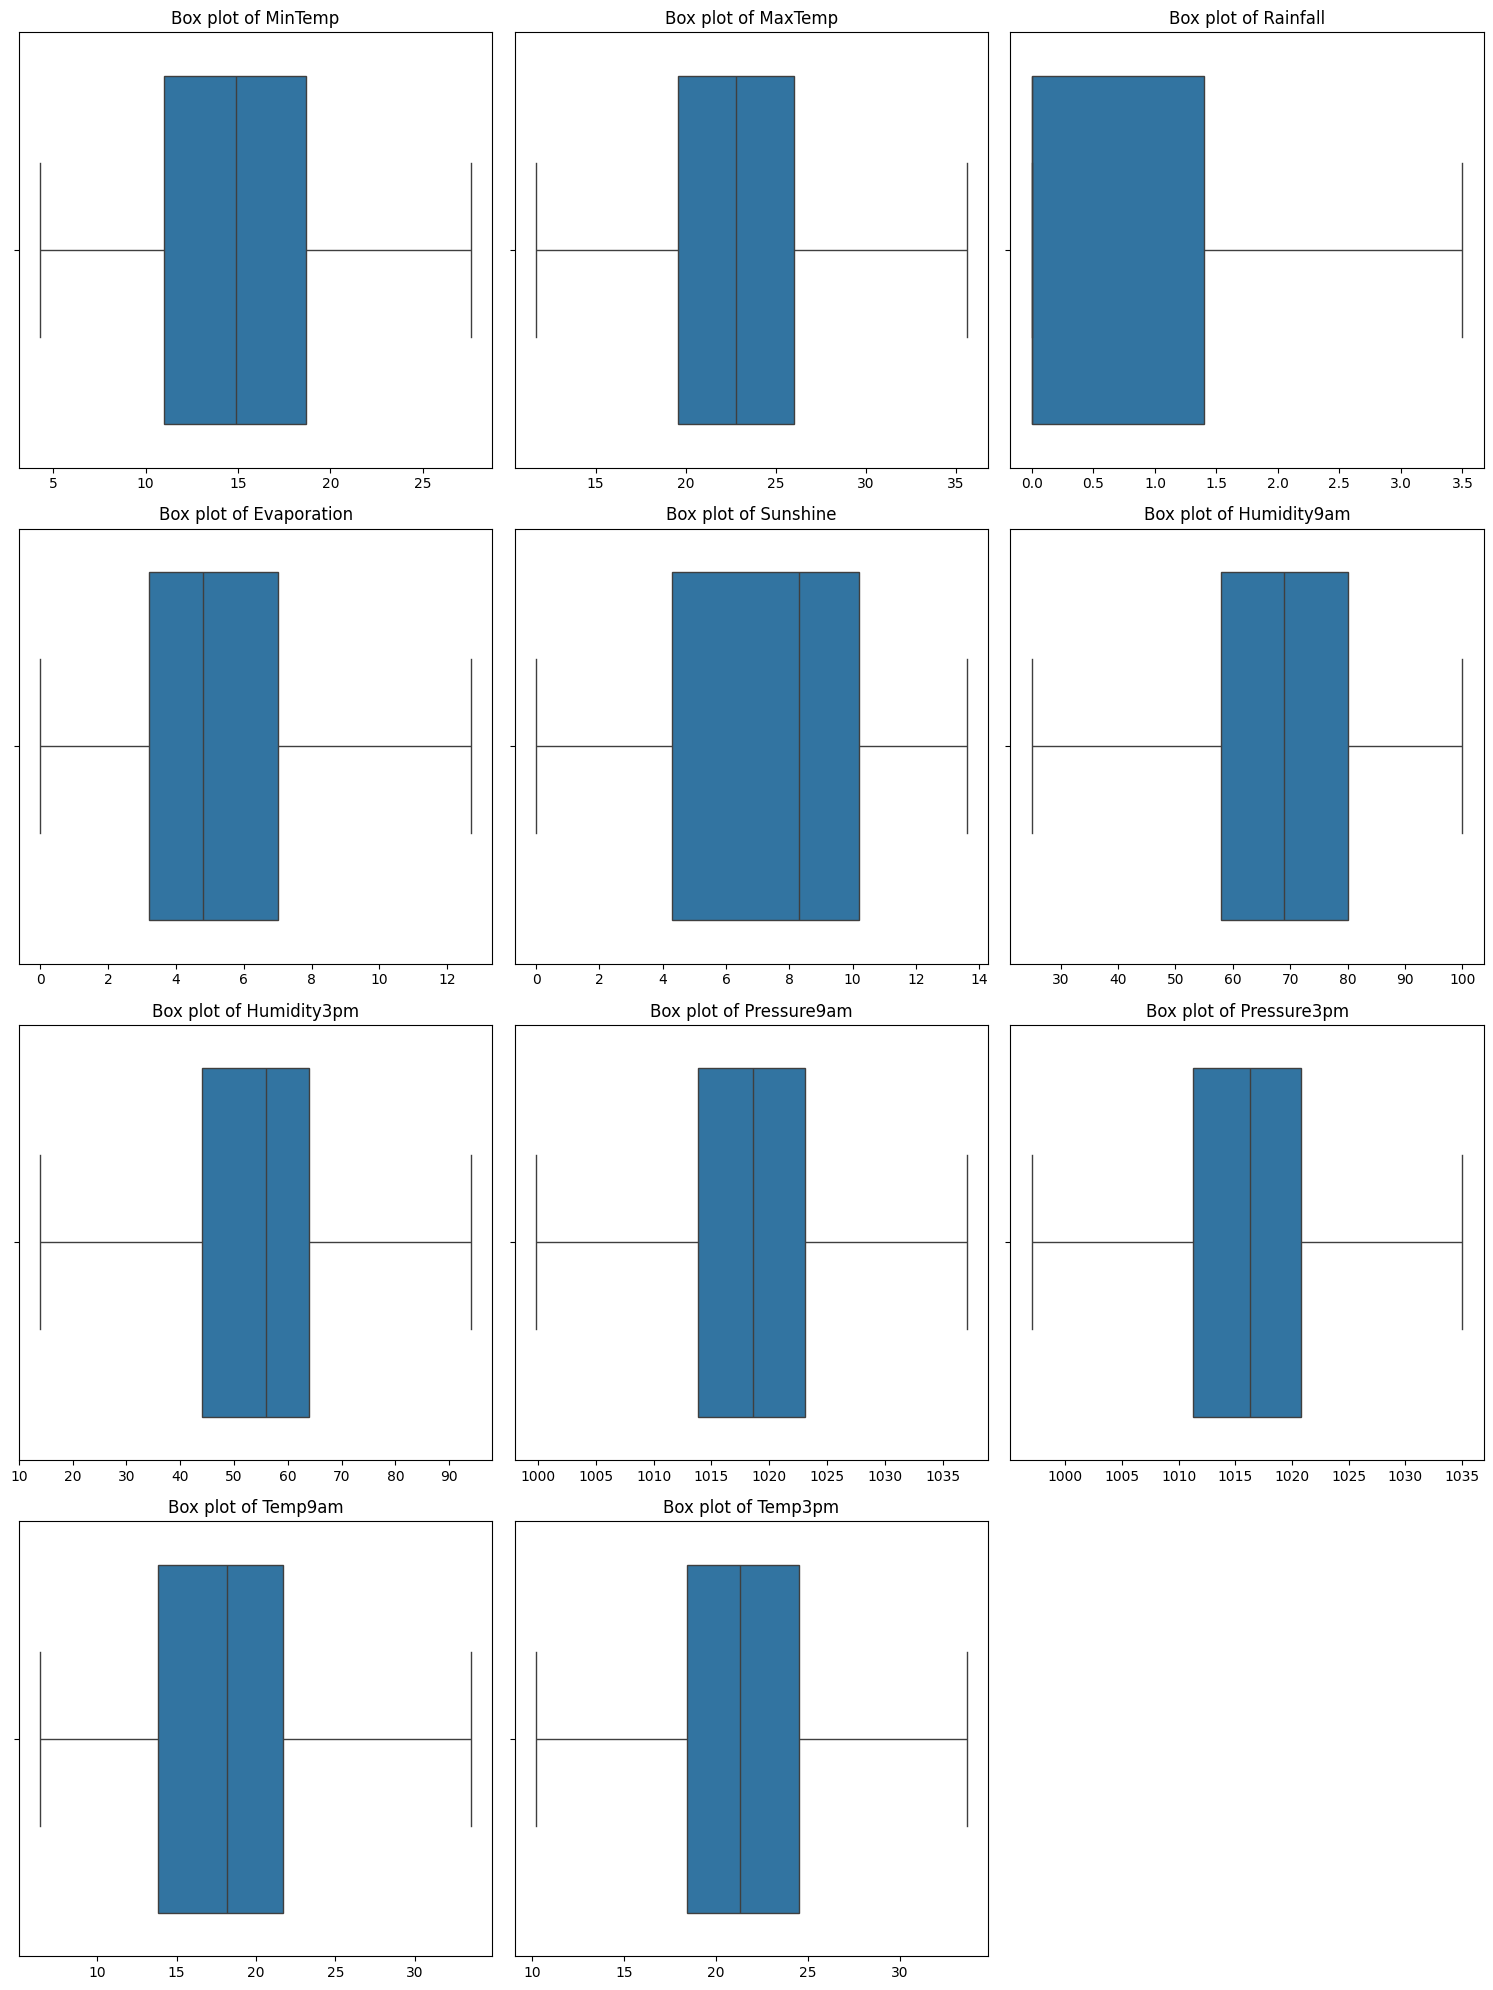

In [ ]:
# Determine the layout of the subplots
num_columns = 3
num_rows = (len(numerical_columns) + num_columns - 1) // num_columns

# Create a figure and axes for subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=num_columns, figsize=(15, 20))
axes = axes.flatten()

# Iterate over the columns and create a boxplot for each one
for i, col in enumerate(numerical_columns):
    sns.boxplot(x=df1[col], ax=axes[i])
    axes[i].set_title(f'Box plot of {col}', fontsize=12)
    axes[i].set_xlabel('')

for ax in axes[len(numerical_columns):]:
    ax.axis('off')

# Adjust layout for better fit and display the plot
plt.tight_layout()
plt.show()

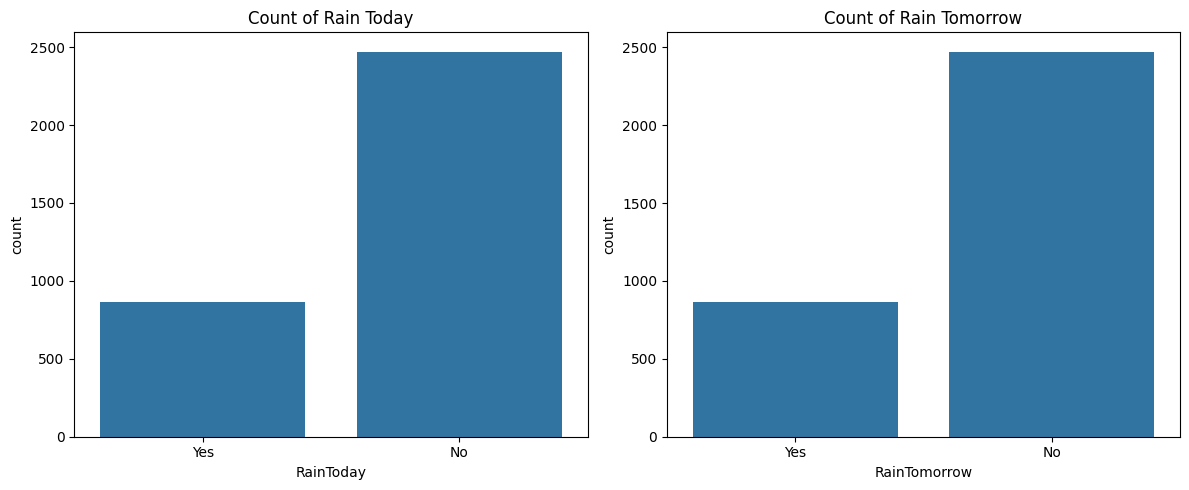

In [ ]:
# df1 is the DataFrame and RainToday, RainTomorrow are the columns
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.countplot(x='RainToday', data=df1)
plt.title('Count of Rain Today')

plt.subplot(1, 2, 2)
sns.countplot(x='RainTomorrow', data=df1)
plt.title('Count of Rain Tomorrow')

plt.tight_layout()
plt.show()

In [ ]:
# Display the count of 'Yes' and 'No' values in the 'RainToday' column
df1['RainToday'].value_counts()

,count
RainToday,
No,2471
Yes,866


In [ ]:
# Display the count of location values in the 'Location' column
df1['Location'].value_counts()

,count
Location,
Sydney,3337


In [ ]:
# drop Location column because having a single value sydney
df1.drop('Location',axis = 1, inplace=True)

# Feature Engineering

* Summer: December to February
* Autumn: March to May
* Winter: June to August
* Spring: September to November

In [ ]:
# Assuming 'Date' is in datetime format, if not, convert it
df1['Date'] = pd.to_datetime(df1['Date'])

# Extract the month from the date
df1['Month'] = df1['Date'].dt.month

# Define a function to map the month to the season
def map_season(month):
    if month in [12, 1, 2]:
        return 'Summer'
    elif month in [3, 4, 5]:
        return 'Autumn'
    elif month in [6, 7, 8]:
        return 'Winter'
    else:
        return 'Spring'

# Apply the function to the 'Month' column to create the 'Season' column
df1['Season'] = df1['Month'].apply(map_season)

In [ ]:
df1.head()

,Date,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Month,Season
0,2008-02-01,19.5,22.4,3.5,6.2,0.0,92.0,84.0,1017.6,1017.4,20.7,20.9,Yes,Yes,2,Summer
1,2008-02-02,19.5,25.6,3.5,3.4,2.7,83.0,73.0,1017.9,1016.4,22.4,24.8,Yes,Yes,2,Summer
2,2008-02-03,21.6,24.5,3.5,2.4,0.1,88.0,86.0,1016.7,1015.6,23.5,23.0,Yes,Yes,2,Summer
3,2008-02-04,20.2,22.8,3.5,2.2,0.0,83.0,90.0,1014.2,1011.8,21.4,20.9,Yes,Yes,2,Summer
4,2008-02-05,19.7,25.7,3.5,4.8,0.0,88.0,74.0,1008.3,1004.8,22.5,25.5,Yes,Yes,2,Summer


In [ ]:
df1['Season'].value_counts()

,count
Season,
Autumn,890
Winter,852
Spring,813
Summer,782


In [ ]:
df1.drop(['Date','Month'],axis = 1, inplace=True)

In [ ]:
# Create a scaler object
scaler = StandardScaler()

# List of numerical columns to scale
numerical_cols = ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
                  'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm',
                  'Temp9am', 'Temp3pm']

# Fit and transform the data
df1[numerical_cols] = scaler.fit_transform(df1[numerical_cols])

# Check the transformed data
df1.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Season
0,1.018465,-0.130924,1.888233,0.379966,-1.889751,1.581397,1.805100,-0.109680,0.196323,0.589169,-0.144626,Yes,Yes,Summer
1,1.018465,0.594922,1.888233,-0.651424,-1.179590,0.982344,1.127223,-0.066487,0.052807,0.936800,0.779732,Yes,Yes,Summer
2,1.479911,0.345413,1.888233,-1.019778,-1.863448,1.315151,1.928350,-0.239259,-0.062006,1.161737,0.353105,Yes,Yes,Summer
3,1.172280,-0.040193,1.888233,-1.093448,-1.889751,0.982344,2.174851,-0.599201,-0.607365,0.732311,-0.144626,Yes,Yes,Summer
4,1.062412,0.617605,1.888233,-0.135729,-1.889751,1.315151,1.188848,-1.448663,-1.611975,0.957249,0.945642,Yes,Yes,Summer


In [ ]:
# Assume 'df' is your DataFrame
categorical_cols = ['Season']
df1 = pd.get_dummies(df1, columns=categorical_cols)

In [ ]:
df1['Season_Autumn'] = df1['Season_Autumn'].astype(int)
df1['Season_Spring'] = df1['Season_Spring'].astype(int)
df1['Season_Summer'] = df1['Season_Summer'].astype(int)
df1['Season_Winter'] = df1['Season_Winter'].astype(int)

In [ ]:
# Assuming 'Yes' and 'No' are the values in the RainToday and RainTomorrow columns
df1['RainToday'] = df1['RainToday'].map({'Yes': 1, 'No': 0})
df1['RainTomorrow'] = df1['RainTomorrow'].map({'Yes': 1, 'No': 0})

In [ ]:
df1.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Season_Autumn,Season_Spring,Season_Summer,Season_Winter
0,1.018465,-0.130924,1.888233,0.379966,-1.889751,1.581397,1.805100,-0.109680,0.196323,0.589169,-0.144626,1,1,0,0,1,0
1,1.018465,0.594922,1.888233,-0.651424,-1.179590,0.982344,1.127223,-0.066487,0.052807,0.936800,0.779732,1,1,0,0,1,0
2,1.479911,0.345413,1.888233,-1.019778,-1.863448,1.315151,1.928350,-0.239259,-0.062006,1.161737,0.353105,1,1,0,0,1,0
3,1.172280,-0.040193,1.888233,-1.093448,-1.889751,0.982344,2.174851,-0.599201,-0.607365,0.732311,-0.144626,1,1,0,0,1,0
4,1.062412,0.617605,1.888233,-0.135729,-1.889751,1.315151,1.188848,-1.448663,-1.611975,0.957249,0.945642,1,1,0,0,1,0


In [ ]:
# Features and target variable
X = df1.drop('RainTomorrow', axis=1)
y = df1['RainTomorrow']

In [ ]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the resulting splits
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

Training set shape: (2669, 16) (2669,)
Testing set shape: (668, 16) (668,)


In [ ]:
# List of models to evaluate
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Linear Discriminant Analysis': LinearDiscriminantAnalysis(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Support Vector Machine": make_pipeline(StandardScaler(), SVC(probability=True)),
    "Naive Bayes": GaussianNB(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

In [ ]:
# Dictionary to hold model results
results = {}

# Evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]

    # Compute metrics
    accuracy_Train = accuracy_score(y_train, y_pred_train)
    accuracy_Test = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_proba)
    conf_matrix = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)

    # Store results
    results[name] = {
        "Train Accuracy": accuracy_Train,
        "Test Accuracy": accuracy_Test,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1,
        "AUC": auc,
        "Confusion Matrix": conf_matrix,
        "Classification Report": class_report
    }

    # print results for each model
    print(f"Results for {name}:")
    print("Train Accuracy:", accuracy_Train)
    print("Test Accuracy:", accuracy_Test )
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)
    print("AUC:", auc)
    print(" ")
    print("Confusion Matrix:\n", conf_matrix)
    print(" ")
    print("Classification Report:\n", class_report)
    print("_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ ")
    print("\n")

Results for Logistic Regression:
Train Accuracy: 0.8400149868864744
Test Accuracy: 0.8173652694610778
Precision: 0.7183098591549296
Recall: 0.5543478260869565
F1 Score: 0.6257668711656442
AUC: 0.8574380165289257
 
Confusion Matrix:
 [[444  40]
 [ 82 102]]
 
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.92      0.88       484
           1       0.72      0.55      0.63       184

    accuracy                           0.82       668
   macro avg       0.78      0.74      0.75       668
weighted avg       0.81      0.82      0.81       668

_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 


Results for K-Nearest Neighbors:
Train Accuracy: 0.8666167103784189
Test Accuracy: 0.7844311377245509
Precision: 0.6298701298701299
Recall: 0.5271739130434783
F1 Score: 0.5739644970414202
AUC: 0.7803853754940712
 
Confusion Matrix:
 [[427  57]
 [ 87  97]]
 
Classification Report:
               precision    recall  f1-scor

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [20:09:07] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Results for XGBoost:
Train Accuracy: 1.0
Test Accuracy: 0.812874251497006
Precision: 0.695364238410596
Recall: 0.5706521739130435
F1 Score: 0.6268656716417911
AUC: 0.844300215594682
 
Confusion Matrix:
 [[438  46]
 [ 79 105]]
 
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.90      0.88       484
           1       0.70      0.57      0.63       184

    accuracy                           0.81       668
   macro avg       0.77      0.74      0.75       668
weighted avg       0.81      0.81      0.81       668

_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 




In [ ]:
# Setting up the hyperparameter grid for each model
param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

param_grid_gb = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5]
}

param_grid_xgb = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5],
    'learning_rate': [0.01, 0.1],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'min_child_weight': [1, 3]
}

In [ ]:
# Random Forest tuning
grid_rf_tuned = GridSearchCV(RandomForestClassifier(), param_grid_rf, cv=3, scoring='accuracy', verbose=1)
grid_rf_tuned.fit(X_train, y_train)

# Gradient Boosting tuning
grid_gb_tuned = GridSearchCV(GradientBoostingClassifier(), param_grid_gb, cv=3, scoring='accuracy', verbose=1)
grid_gb_tuned.fit(X_train, y_train)

# XGBoost tuning
grid_xgb_tuned = GridSearchCV(XGBClassifier( eval_metric='logloss'), param_grid_xgb, cv=3, scoring='accuracy', verbose=1)
grid_xgb_tuned.fit(X_train, y_train)

Fitting 3 folds for each of 24 candidates, totalling 72 fits
Fitting 3 folds for each of 8 candidates, totalling 24 fits
Fitting 3 folds for each of 64 candidates, totalling 192 fits


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'colsample_bytree': [0.8, 1.0],
                         'learning_rate': [0.01, 0.1], 'max_depth': [3, 5],
                         'min_child_weight': [1, 3], 'n_estimators': [100, 200],
                         'subsample': [0.8, 1.0]},
             scoring='accuracy', verbose=1)

In [ ]:
# Dictionary to hold model results
results = {}

# Models with their respective grid search objects
models_tuned = {
    'Tuned Random Forest': grid_rf_tuned,
    'Tuned Gradient Boosting': grid_gb_tuned,
    'Tuned XGBoost': grid_xgb_tuned
}

In [ ]:
# Evaluate each tuned model
for name, grid in models_tuned.items():
    # Best estimator found by Grid Search
    best_model = grid.best_estimator_

    # Predictions on training and testing sets
    y_train_pred = best_model.predict(X_train)
    y_test_pred = best_model.predict(X_test)
    y_test_proba = best_model.predict_proba(X_test)[:, 1]

    # Compute metrics
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    precision = precision_score(y_test, y_test_pred)
    recall = recall_score(y_test, y_test_pred)
    f1 = f1_score(y_test, y_test_pred)
    auc = roc_auc_score(y_test, y_test_proba)
    conf_matrix = confusion_matrix(y_test, y_test_pred)
    class_report = classification_report(y_test, y_test_pred)

    # Store results
    results[name] = {
        "Train Accuracy": train_accuracy,
        "Test Accuracy": test_accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1,
        "AUC": auc,
        "Confusion Matrix": conf_matrix,
        "Classification Report": class_report
    }

    # Print results for each model
    print(f"Results for {name}:")
    print(f"Train Accuracy: {train_accuracy:.4f}")
    print(f"Test Accuracy: {test_accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"AUC: {auc:.4f}")
    print("Confusion Matrix:\n", conf_matrix)
    print(" ")
    print("\nClassification Report:\n", class_report)
    print(" ")
    print("-" * 50)

Results for Tuned Random Forest:
Train Accuracy: 0.9326
Test Accuracy: 0.8219
Precision: 0.7407
Recall: 0.5435
F1 Score: 0.6270
AUC: 0.8585
Confusion Matrix:
 [[449  35]
 [ 84 100]]
 

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.93      0.88       484
           1       0.74      0.54      0.63       184

    accuracy                           0.82       668
   macro avg       0.79      0.74      0.75       668
weighted avg       0.81      0.82      0.81       668

 
--------------------------------------------------
Results for Tuned Gradient Boosting:
Train Accuracy: 0.8794
Test Accuracy: 0.8249
Precision: 0.7481
Recall: 0.5489
F1 Score: 0.6332
AUC: 0.8527
Confusion Matrix:
 [[450  34]
 [ 83 101]]
 

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.93      0.88       484
           1       0.75      0.55      0.63       184

    accuracy                      

In [ ]:
tuned_gradient_boosting = grid_gb_tuned.best_estimator_

In [ ]:
with open('model.pkl','wb') as file:
  pickle.dump(best_model,file)

# Predict Tomorrow rain comes or not using user input values

In [ ]:
# Collect input from the user
data = {
    "MinTemp": [float(input("Enter minimum temperature (-5 to 50 °C): "))],
    "MaxTemp": [float(input("Enter maximum temperature (-5 to 50 °C): "))],
    "Rainfall": [float(input("Enter rainfall in mm (0 to 300 mm): "))],
    "Evaporation": [float(input("Enter evaporation (mm): "))],
    "Sunshine": [float(input("Enter number of sunshine hours: "))],
    "Humidity9am": [float(input("Enter humidity at 9 AM (0-100%): "))],
    "Humidity3pm": [float(input("Enter humidity at 3 PM (0-100%): "))],
    "Pressure9am": [float(input("Enter pressure at 9 AM (980-1040 hPa): "))],
    "Pressure3pm": [float(input("Enter pressure at 3 PM (980-1040 hPa): "))],
    "Temp9am": [float(input("Enter temperature at 9 AM (-5 to 50 °C): "))],
    "Temp3pm": [float(input("Enter temperature at 3 PM (-5 to 50 °C): "))],
    "RainToday": [int(input("Did it rain today? Enter 1 for Yes, 0 for No: "))],
    "Season_Autumn": [0],
    "Season_Spring": [0],
    "Season_Summer": [0],
    "Season_Winter": [0]
}

# Season input
season_choice = int(input("Enter the number (1-4) corresponding to the season: 1: Autumn, 2: Spring, 3: Summer, 4: Winter: "))
seasons = ["Season_Autumn", "Season_Spring", "Season_Summer", "Season_Winter"]
data[seasons[season_choice - 1]][0] = 1

# Create DataFrame
input_df = pd.DataFrame(data)

# Scale numerical features
numerical_columns = ["MinTemp", "MaxTemp", "Rainfall", "Evaporation", "Sunshine",
                     "Humidity9am", "Humidity3pm", "Pressure9am", "Pressure3pm",
                     "Temp9am", "Temp3pm"]
input_df[numerical_columns] = scaler.transform(input_df[numerical_columns])

# Prediction
predicted_rainfall = tuned_gradient_boosting.predict(input_df)

# Convert prediction to 'Yes' or 'No'
predicted_rainfall_labels = ['Yes' if x == 1 else 'No' for x in predicted_rainfall]
print("- "*420)
print(f'Based on the information provided, the forecast for tomorrow indicates that it will rain: --- {predicted_rainfall_labels[0]} ---')


KeyboardInterrupt: Interrupted by user

# **1. Your views about the problem statement?**

The problem statement on rainfall prediction for "The Daily Buzz," a newspaper located in Sydney, is quite relevant and highly practical. It uses machine learning abilities to improve the accuracy of weather forecasts, which are quite important for planning and safety purposes within both urban and agricultural settings. The initiative enhances not only public convenience and safety but also hazards the possibility of merging technology with journalism in rendering vital services innovatively. In meeting this challenge, I will implement different models of classification that will include decision trees, random forest, gradient boosting, and finally, XGBoost. These are quite a number of models and methods that, besides reducing overfitting, increase predictive accuracy on complex data like weather data to provide greater rainfall prediction accuracy.

# 2. What will be your approach to solving this task?

The following steps will be performed to solve this task:

* Data Preprocessing: Clean the data for handling missing values, treat outliers, encoding categorical variables, and standardizing numerical inputs to get them ready for modeling.

* Model Selection: Several classification models, notably, decision trees and ensemble methods, like Random Forest, Gradient Boosting, and XGBoost, should be tested to exploit their capacity in nonlinearities and interaction features.

* Model Evaluation: All models will be evaluated using metrics like accuracy, precision, recall, F1-score, and AUC. In addition, confusion matrices will also show the performances.

* Model Tuning: For every model, grid search along with cross-validation is done to tune its hyperparameters to optimal parameters so that the best performance of the model can be attained.

* Final Model Selection: By comparing the performance of the models on test metrics, the final model will be chosen to predict rainfall.

* User Input and Prediction: There has to be the availability of a system that can take real-time weather data from the user as input and use the best model selected for the prediction of rainfall communication.





# 3. What were the available ML model options you had to perform this task?

Following ML model option are availabe for perform this classification task:
* Logistic Regression
* K-Nearest Neighbors
* Linear Discriminant Analysis
* Decision Tree
* Random Forest
* Gradient Boosting
* Support Vector Machine
* Naive Bayes
* XGBoost classifier

# 4. Which model’s performance is best and what could be the possible reason for that?

The Gradient Boosting Classifier would probably turn in the best performance among the tested models because it builds upon previous trees errors, thus improving in accuracy at every iteration. That may be due to its ability in handling different distributions of data and interactions. Therefore, this will work very fine on complex data like weather data that involves non-linear relationships affected by many atmospheric factors.

# 5. What steps can you take to improve this selected model’s performance even further?

* Feature Engineering: Create more new features that might capture the patterns more effectively.
* Ensemble Techniques: Combine multiple models' output for better reliability and accuracy.
* Advanced Hyperparameter Tuning: Explore more advanced tuning techniques as Randomized Search.
* Regular Updating and Retraining: It means continuous updating of the dataset with new weather data and retraining of the model to keep it at par with changing climatic conditions and new weather patterns.